# Project 6: IMDB

We will be looking for the following things:

- A clear problem statement & description of the goals of your study to be included in the final report
- Data from IMDB
- Cleaned and refined data
- Visualization. Plots that describe your data and evaluate your model.
- Tree-based models (use any combination of ensemble techniques: random forests, bagging, boosting).
- A blog post presenting the results of your findings as a report to Netflix, including:
   a problem statement,
   summary statistics of the various factors (e.g. year, number of ratings, etc.),  
   your model, 
   at least 2 graphics,
   and your recommendations for next steps!

## Problem statement & goals

### Problem statement:

- To identify the top 10 most influential features to determining the IMDB rating of a movie

### Sub-goals:

- To create a tree-based machine learning model which can predict the IMDB rating of a movie

## Getting the data

### Required libraries

In [88]:
% matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import requests
import json
import datetime
import random

# Using IMDBpie API to get data from IMDB website
from imdbpie import Imdb

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer

In [2]:
random.seed(44)

In [3]:
# Create an instance of imdbpie

imdb = Imdb()
imdb = Imdb(anonymize=True) # to proxy requests

In [4]:
# Getting top 250 ever

top250 = imdb.top_250()

In [5]:
type(top250)

list

In [6]:
df250 = pd.DataFrame(top250)

In [7]:
df250.head()

,can_rate,image,num_votes,rating,tconst,title,type,year
0,True,{u'url': u'https://images-na.ssl-images-amazon...,1722217,9.3,tt0111161,The Shawshank Redemption,feature,1994
1,True,{u'url': u'https://images-na.ssl-images-amazon...,1177016,9.2,tt0068646,The Godfather,feature,1972
2,True,{u'url': u'https://images-na.ssl-images-amazon...,806803,9.0,tt0071562,The Godfather: Part II,feature,1974
3,True,{u'url': u'https://images-na.ssl-images-amazon...,1708009,9.0,tt0468569,The Dark Knight,feature,2008
4,True,{u'url': u'https://images-na.ssl-images-amazon...,458976,8.9,tt0050083,12 Angry Men,feature,1957


In [8]:
# Function to get movie entries using OMDB API, code obtained from lab

def get_entry(entry):
    res = requests.get('http://www.omdbapi.com/?i='+entry)
    if res.status_code != 200:
        print entry, res.status_code
    else:
        print '.',
    try:
        j = json.loads(res.text)
    except ValueError:
        j = None
    return j

In [9]:
# Getting a list of title code for top250 movies
entries = list(df250['tconst'].values)

In [292]:
entries_dict_list = [get_entry(e) for e in entries]

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .


In [293]:
df = pd.DataFrame(entries_dict_list)

In [294]:
df.head()

,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Poster,Rated,Released,Response,Runtime,Title,Type,Writer,Year,imdbID,imdbRating,imdbVotes
0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Nominated for 7 Oscars. Another 18 wins & 30 n...,USA,Frank Darabont,"Crime, Drama",English,80,Two imprisoned men bond over a number of years...,https://images-na.ssl-images-amazon.com/images...,R,14 Oct 1994,True,142 min,The Shawshank Redemption,movie,"Stephen King (short story ""Rita Hayworth and S...",1994,tt0111161,9.3,"1,711,064"
1,"Marlon Brando, Al Pacino, James Caan, Richard ...",Won 3 Oscars. Another 23 wins & 27 nominations.,USA,Francis Ford Coppola,"Crime, Drama","English, Italian, Latin",100,The aging patriarch of an organized crime dyna...,https://images-na.ssl-images-amazon.com/images...,R,24 Mar 1972,True,175 min,The Godfather,movie,"Mario Puzo (screenplay), Francis Ford Coppola ...",1972,tt0068646,9.2,"1,169,904"
2,"Al Pacino, Robert Duvall, Diane Keaton, Robert...",Won 6 Oscars. Another 10 wins & 20 nominations.,USA,Francis Ford Coppola,"Crime, Drama","English, Italian, Spanish, Latin, Sicilian",80,The early life and career of Vito Corleone in ...,https://images-na.ssl-images-amazon.com/images...,R,20 Dec 1974,True,202 min,The Godfather: Part II,movie,"Francis Ford Coppola (screenplay), Mario Puzo ...",1974,tt0071562,9.0,"800,469"
3,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Won 2 Oscars. Another 146 wins & 142 nominations.,"USA, UK",Christopher Nolan,"Action, Crime, Drama","English, Mandarin",82,When the menace known as the Joker wreaks havo...,https://images-na.ssl-images-amazon.com/images...,PG-13,18 Jul 2008,True,152 min,The Dark Knight,movie,"Jonathan Nolan (screenplay), Christopher Nolan...",2008,tt0468569,9.0,"1,699,835"
4,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",Nominated for 3 Oscars. Another 16 wins & 8 no...,USA,Sidney Lumet,"Crime, Drama",English,N/A,A jury holdout attempts to prevent a miscarria...,https://images-na.ssl-images-amazon.com/images...,APPROVED,01 Apr 1957,True,96 min,12 Angry Men,movie,"Reginald Rose (story), Reginald Rose (screenplay)",1957,tt0050083,8.9,"455,987"


In [295]:
df.shape

(250, 20)

### Get Gross

In [297]:
# Reverting to webscrapping to get gross of each movie
# Creating a function to scrap gross, company credits and technical details of each movie

def get_test(entry):
    response = requests.get('http://www.imdb.com/title/' + entry)
    html = response.text
    print html

In [298]:
get_test(entries[0])










<!DOCTYPE html>
<html
xmlns:og="http://ogp.me/ns#"
xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///title/tt0111161?src=mdot">
        
    
            <script type="text/javascript">var ue_t0=window.ue_t0||+new Date();</script>
            <script type="text/javascript">
                var ue_mid = "A1EVAM02EL8SFB"; 
                var ue_sn = "www.imdb.com";  
                var ue_furl = "fls-na.amazon.com";
                var ue_sid = "000-0000000-0000000";
                var ue_id = "0ED4GC2HSKYMK628SZET";
                (function(e){var c=e;var a=c.ue||{};a.main_scope="mainscopecsm";a.q=[];a.t0=c.ue_t0||+new Date();a.d=g;function g(h){return +new Date()-(h?0:a.t0)}function d(h){return function(){a.q.push({n:h,a:arguments,t:a.d()})}}function b(m,l,h,j,i){var k={m:m,f:l,l:h,c:""+j,err:

In [299]:
# Reverting to webscrapping to get gross of each movie
# Creating a function to scrap gross, company credits and technical details of each movie

def get_gross(entry):
    response = requests.get('http://www.imdb.com/title/' + entry)
    html = response.text
    try:
        
        gross = re.findall('Gross:</h4>\s*\$([^ ]*)', html)
        return int(gross[0].replace(',',''))
    except Exception as ex:
        print ex, entry, requests.status_codes
        return None

In [301]:
gross_list = [(x,get_gross(x)) for x in entries]

list index out of range tt0050083 <module 'requests.status_codes' from '//anaconda/lib/python2.7/site-packages/requests/status_codes.pyc'>
list index out of range tt0038650 <module 'requests.status_codes' from '//anaconda/lib/python2.7/site-packages/requests/status_codes.pyc'>
list index out of range tt0064116 <module 'requests.status_codes' from '//anaconda/lib/python2.7/site-packages/requests/status_codes.pyc'>
list index out of range tt0034583 <module 'requests.status_codes' from '//anaconda/lib/python2.7/site-packages/requests/status_codes.pyc'>
list index out of range tt0021749 <module 'requests.status_codes' from '//anaconda/lib/python2.7/site-packages/requests/status_codes.pyc'>
list index out of range tt0057012 <module 'requests.status_codes' from '//anaconda/lib/python2.7/site-packages/requests/status_codes.pyc'>
list index out of range tt0043014 <module 'requests.status_codes' from '//anaconda/lib/python2.7/site-packages/requests/status_codes.pyc'>
list index out of range tt0

In [302]:
df_gross = pd.DataFrame(gross_list, columns = ['imdbID','Gross'])

In [303]:
df_gross.head()

,imdbID,Gross
0,tt0111161,28341469.0
1,tt0068646,134821952.0
2,tt0071562,57300000.0
3,tt0468569,533316061.0
4,tt0050083,NaN


## Get sound technical details

In [304]:
# function to get technical details of movie

def get_sound(entry):
    response = requests.get('http://www.imdb.com/title/' + entry)
    html = response.text
    try:
        sound_list = re.findall('sound_mixes=([^&]*)', html)
        sound = ''
        for i in sound_list:
            sound = sound + ' ' + i
        return sound
        
    except Exception as ex:
        print entry, ex, requests.status_codes
        return None

In [305]:
get_sound(entries[0])

u' dolby_digital'

In [306]:
sound_list = [(x, get_sound(x)) for x in entries]

In [307]:
sound_list

[(u'tt0111161', u' dolby_digital'),
 (u'tt0068646', u' dts mono'),
 (u'tt0071562', u' mono'),
 (u'tt0468569', u' dolby_digital sdds dts'),
 (u'tt0050083', u' mono'),
 (u'tt0108052', u' dts dts_stereo'),
 (u'tt0110912', u' dolby_digital'),
 (u'tt0167260', u' dts_es dolby_digital_ex sdds'),
 (u'tt0060196', u' mono'),
 (u'tt0137523', u' dolby_digital dts'),
 (u'tt0120737', u' dts_es dolby_digital_ex sdds'),
 (u'tt0080684', u' 70_mm_6_track dolby_stereo'),
 (u'tt0109830', u' dts dolby_digital'),
 (u'tt1375666', u' dolby_digital dts sdds'),
 (u'tt0167261', u' dts_es dolby_digital_ex sdds'),
 (u'tt0073486', u' mono'),
 (u'tt0099685', u' dolby_sr'),
 (u'tt0133093', u' dts dolby_digital sdds'),
 (u'tt0047478', u' mono stereo'),
 (u'tt0076759', u' 70_mm_6_track dolby dts_stereo dolby_digital sdds mono'),
 (u'tt0317248', u' dolby_digital sdds'),
 (u'tt0114369', u' dts dolby_digital'),
 (u'tt0102926', u' dolby_sr'),
 (u'tt0038650', u' mono'),
 (u'tt0114814', u' dolby_digital'),
 (u'tt0118799', u'

In [308]:
df_sound = pd.DataFrame(sound_list, columns = ['imdbID','sound'])
df_sound.head()

# Planning to use a countvectorizer to break up the sound types into categorical features.

,imdbID,sound
0,tt0111161,dolby_digital
1,tt0068646,dts mono
2,tt0071562,mono
3,tt0468569,dolby_digital sdds dts
4,tt0050083,mono


## Cleaning the data

In [309]:
print (df.columns)

Index([u'Actors', u'Awards', u'Country', u'Director', u'Genre', u'Language',
       u'Metascore', u'Plot', u'Poster', u'Rated', u'Released', u'Response',
       u'Runtime', u'Title', u'Type', u'Writer', u'Year', u'imdbID',
       u'imdbRating', u'imdbVotes'],
      dtype='object')


In [310]:
df.head(2)

,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Poster,Rated,Released,Response,Runtime,Title,Type,Writer,Year,imdbID,imdbRating,imdbVotes
0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Nominated for 7 Oscars. Another 18 wins & 30 n...,USA,Frank Darabont,"Crime, Drama",English,80,Two imprisoned men bond over a number of years...,https://images-na.ssl-images-amazon.com/images...,R,14 Oct 1994,True,142 min,The Shawshank Redemption,movie,"Stephen King (short story ""Rita Hayworth and S...",1994,tt0111161,9.3,"1,711,064"
1,"Marlon Brando, Al Pacino, James Caan, Richard ...",Won 3 Oscars. Another 23 wins & 27 nominations.,USA,Francis Ford Coppola,"Crime, Drama","English, Italian, Latin",100,The aging patriarch of an organized crime dyna...,https://images-na.ssl-images-amazon.com/images...,R,24 Mar 1972,True,175 min,The Godfather,movie,"Mario Puzo (screenplay), Francis Ford Coppola ...",1972,tt0068646,9.2,"1,169,904"


In [311]:
# Deleting Poster and Response columns

del df['Poster']
del df['Response']

In [312]:
# Checking values in Type column

df['Type'].value_counts()

movie    250
Name: Type, dtype: int64

In [313]:
# Delete type column since it won't be useful (all same value)

del df['Type']

In [314]:
# Replace "N/A" with ''

df.loc[:,'Awards'] = df['Awards'].apply(lambda x: (x).replace("N/A", ''))

In [315]:
# Converting runtime to integer of minutes
df.loc[:,'Runtime'] = df['Runtime'].apply(lambda x: int(x.split()[0]))

In [316]:
# Converting ratings to float
df.loc[:, 'imdbRating'] = df['imdbRating'].astype(float)

In [317]:
# Converting votes to int

df.loc[:, 'imdbVotes'] = df['imdbVotes'].apply(lambda x: int(x.replace(',','')))

In [318]:
# Replace "N/A" with np.nan

df.loc[:,'Metascore'] = df['Metascore'].apply(lambda x: (x).replace("N/A", '0'))

In [319]:
df.loc[:,'Metascore'] = df['Metascore'].astype(float)

In [320]:
df.loc[:,'Metascore'] = df['Metascore'].apply(lambda x: np.nan if x == 0 else x)

In [321]:
def change_date(x):
    try:
        return datetime.datetime.strptime(x, "%d %b %Y")
    except:
        return None

In [322]:
df.loc[:,'Released'] = df['Released'].apply(change_date)

In [323]:
df.loc[:,'Year'] = df["Year"].astype(int)

In [324]:
df.dtypes

Actors                object
Awards                object
Country               object
Director              object
Genre                 object
Language              object
Metascore            float64
Plot                  object
Rated                 object
Released      datetime64[ns]
Runtime                int64
Title                 object
Writer                object
Year                   int64
imdbID                object
imdbRating           float64
imdbVotes              int64
dtype: object

In [325]:
df = pd.merge(df, df_gross, on= 'imdbID')
df.head(2)

,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Rated,Released,Runtime,Title,Writer,Year,imdbID,imdbRating,imdbVotes,Gross
0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Nominated for 7 Oscars. Another 18 wins & 30 n...,USA,Frank Darabont,"Crime, Drama",English,80.0,Two imprisoned men bond over a number of years...,R,1994-10-14,142,The Shawshank Redemption,"Stephen King (short story ""Rita Hayworth and S...",1994,tt0111161,9.3,1711064,28341469.0
1,"Marlon Brando, Al Pacino, James Caan, Richard ...",Won 3 Oscars. Another 23 wins & 27 nominations.,USA,Francis Ford Coppola,"Crime, Drama","English, Italian, Latin",100.0,The aging patriarch of an organized crime dyna...,R,1972-03-24,175,The Godfather,"Mario Puzo (screenplay), Francis Ford Coppola ...",1972,tt0068646,9.2,1169904,134821952.0


In [326]:
df = pd.merge(df, df_sound, on= 'imdbID')
df.head(2)

,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Rated,Released,Runtime,Title,Writer,Year,imdbID,imdbRating,imdbVotes,Gross,sound
0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Nominated for 7 Oscars. Another 18 wins & 30 n...,USA,Frank Darabont,"Crime, Drama",English,80.0,Two imprisoned men bond over a number of years...,R,1994-10-14,142,The Shawshank Redemption,"Stephen King (short story ""Rita Hayworth and S...",1994,tt0111161,9.3,1711064,28341469.0,dolby_digital
1,"Marlon Brando, Al Pacino, James Caan, Richard ...",Won 3 Oscars. Another 23 wins & 27 nominations.,USA,Francis Ford Coppola,"Crime, Drama","English, Italian, Latin",100.0,The aging patriarch of an organized crime dyna...,R,1972-03-24,175,The Godfather,"Mario Puzo (screenplay), Francis Ford Coppola ...",1972,tt0068646,9.2,1169904,134821952.0,dts mono


In [327]:
# Merging actors' name so we can countvectorizer FirstLast name together

df.loc[:, 'Actors'] = df['Actors'].apply(lambda x: x.replace('-',''))

In [328]:
# Merging Directors' name so we can countvectorizer FirstLast name together

df.loc[:, 'Director'] = df['Director'].apply(lambda x: x.replace(' ',''))

In [329]:
# Merging genres so we can countvectorizer properly

df.loc[:, 'Genre'] = df['Genre'].apply(lambda x: x.replace(' ',''))

In [330]:
# Merging Writer so we can countvectorizer properly

df.loc[:, 'Writer'] = df['Writer'].apply(lambda x: x.replace(' ',''))

In [331]:
# Merging words in country so we can countvectorizer properly

df.loc[:, 'Country'] = df['Country'].apply(lambda x: x.replace(' ',''))

In [332]:
# Merging words in sound so we can countvectorizer properly

df.loc[:, 'sound'] = df['sound'].apply(lambda x: x.replace('_',''))

In [333]:
df.head(2)

,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Rated,Released,Runtime,Title,Writer,Year,imdbID,imdbRating,imdbVotes,Gross,sound
0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Nominated for 7 Oscars. Another 18 wins & 30 n...,USA,FrankDarabont,"Crime,Drama",English,80.0,Two imprisoned men bond over a number of years...,R,1994-10-14,142,The Shawshank Redemption,"StephenKing(shortstory""RitaHayworthandShawshan...",1994,tt0111161,9.3,1711064,28341469.0,dolbydigital
1,"Marlon Brando, Al Pacino, James Caan, Richard ...",Won 3 Oscars. Another 23 wins & 27 nominations.,USA,FrancisFordCoppola,"Crime,Drama","English, Italian, Latin",100.0,The aging patriarch of an organized crime dyna...,R,1972-03-24,175,The Godfather,"MarioPuzo(screenplay),FrancisFordCoppola(scree...",1972,tt0068646,9.2,1169904,134821952.0,dts mono


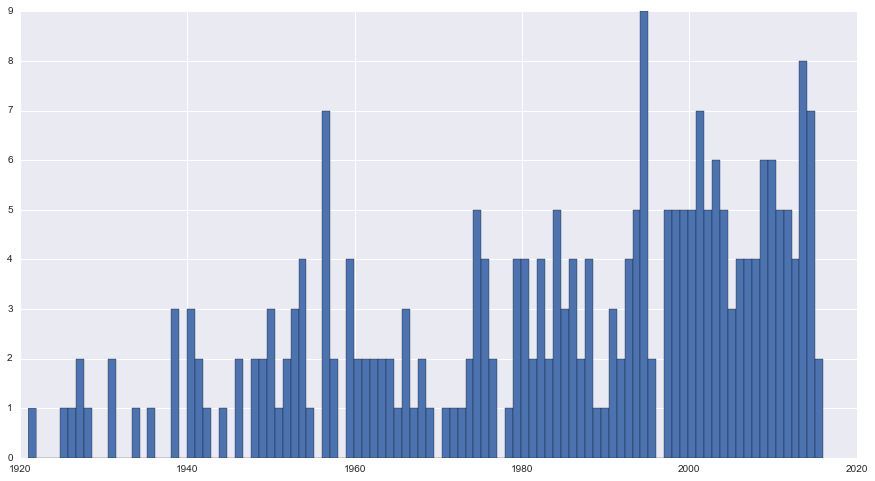

In [334]:
df['Year'].hist(figsize = (15,8), bins = 100)

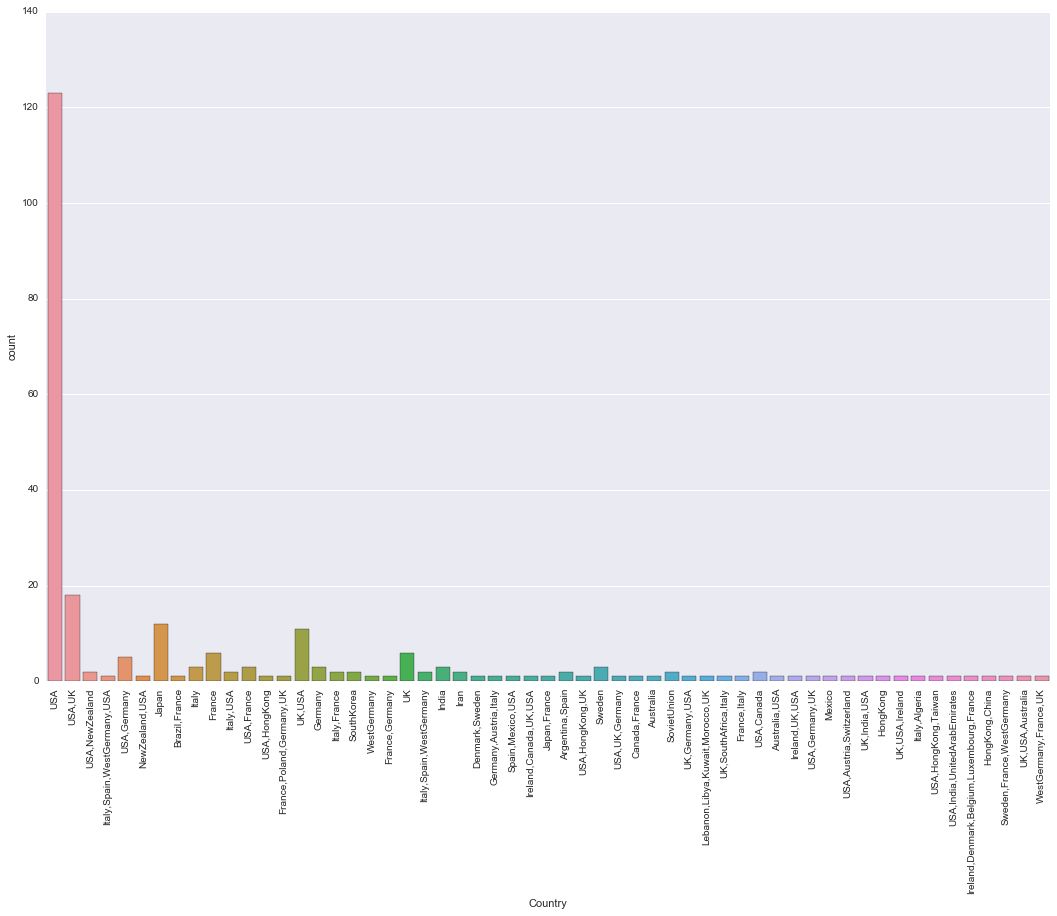

In [335]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,12))
ax = sns.countplot(x='Country', data = df)
plt.xticks(rotation=90)
plt.savefig('proj6_movies_by_country.png')

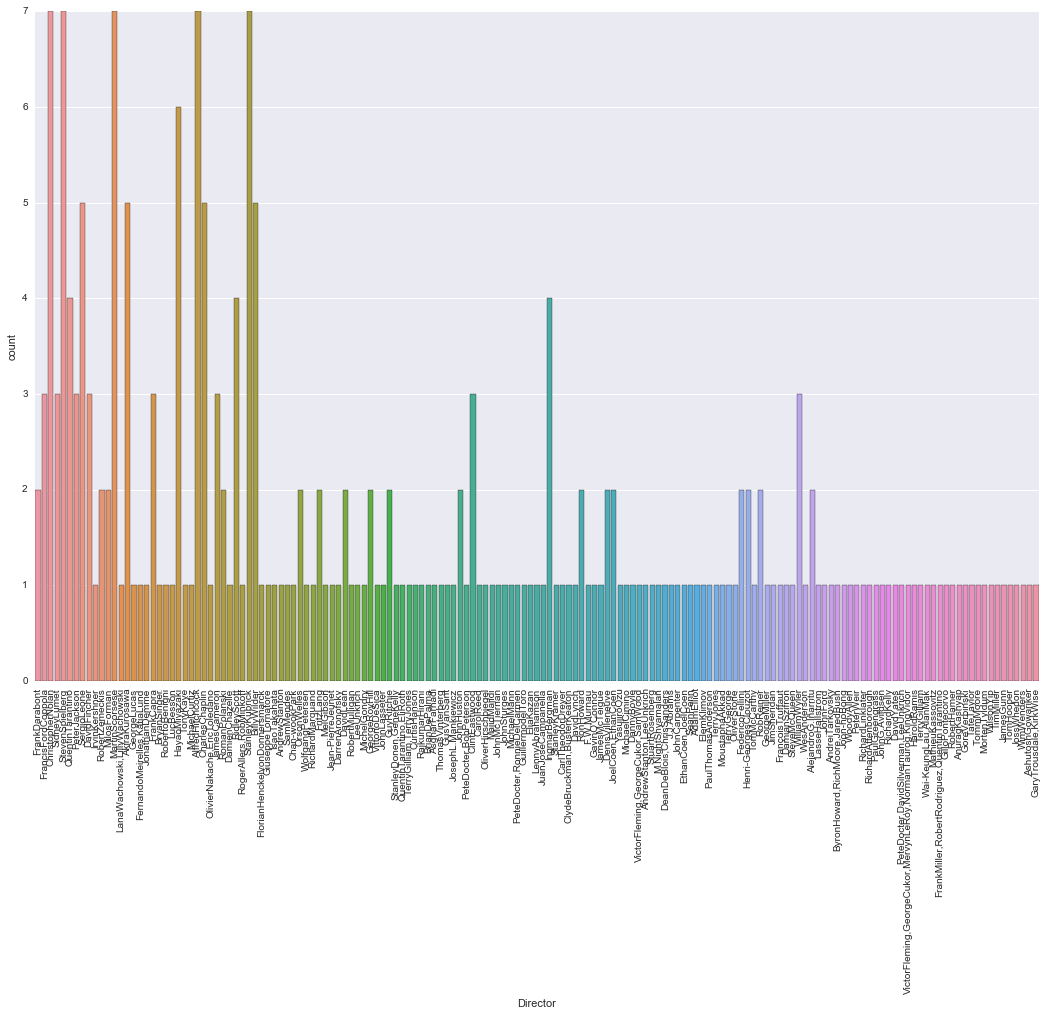

In [336]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,12))
ax = sns.countplot(x='Director', data = df)
plt.xticks(rotation=90)
plt.savefig('proj6_movies_by_director.png')

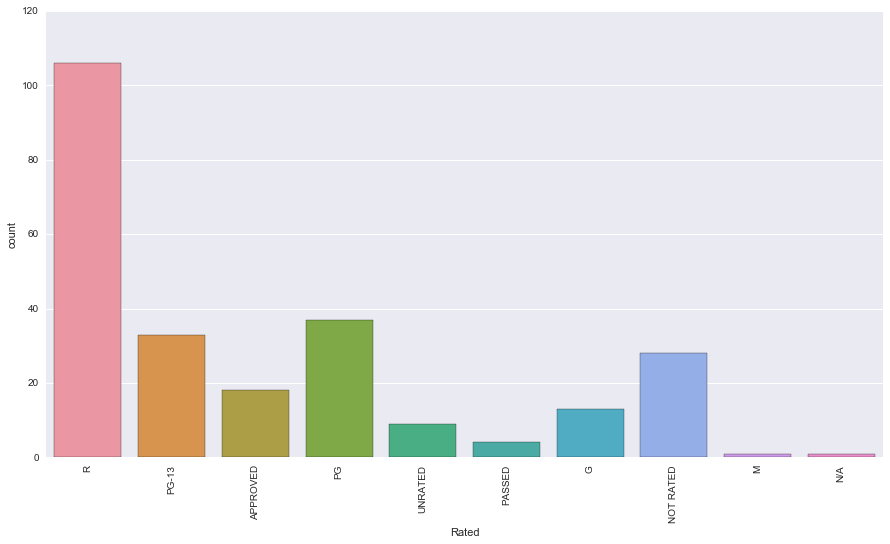

In [337]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
ax = sns.countplot(x='Rated', data = df)
plt.xticks(rotation=90)
plt.savefig('proj6_movies_by_ratings.png')

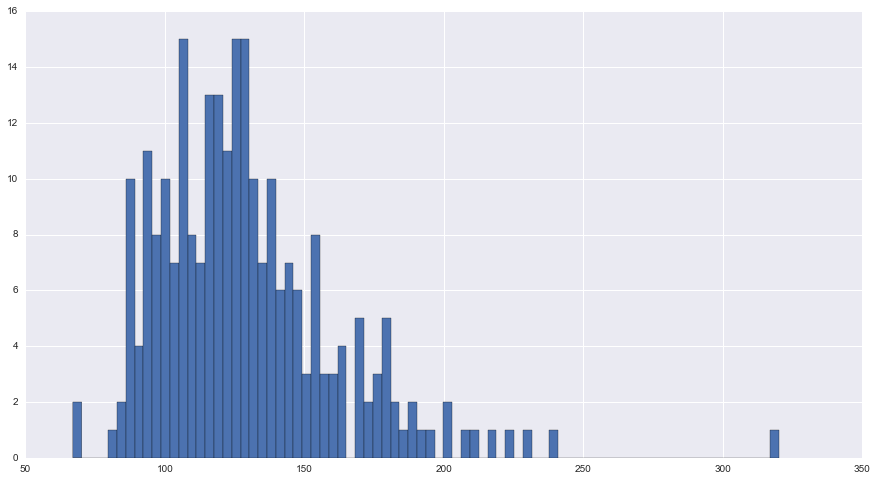

In [338]:
df['Runtime'].hist(figsize = (15,8), bins = 80)

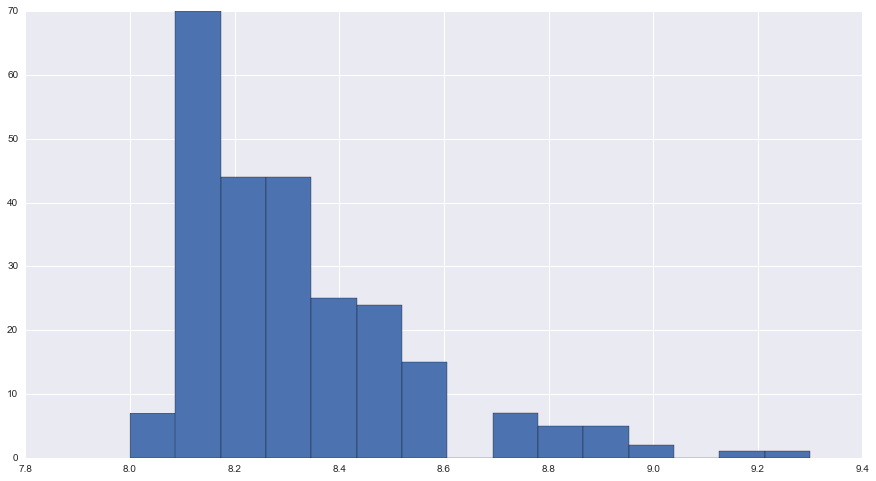

In [339]:
df['imdbRating'].hist(figsize = (15,8), bins = 15)

In [340]:
gross_df = df[df['Gross'] > 0]

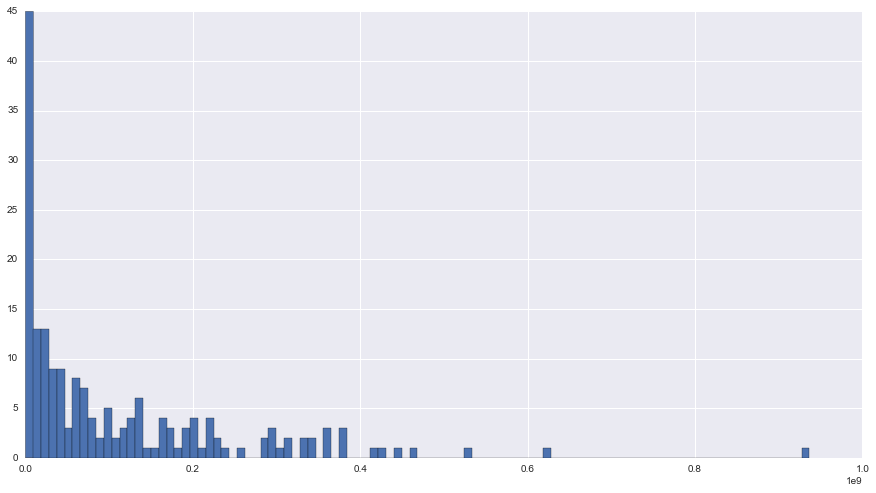

In [341]:
gross_df['Gross'].hist(figsize = (15,8), bins = 100)

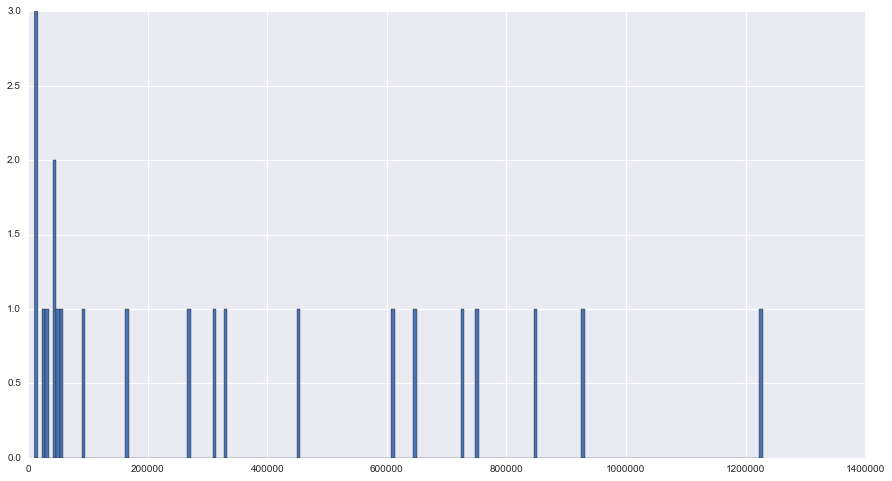

In [342]:
gross_df = df[df['Gross'] < 2000000]
gross_df['Gross'].hist(figsize = (15,8), bins = 200)

## Unpacking Awards column

In [343]:
def win_oscar(x):
    try:
        return int(re.findall('Won\s(\d)\sOscars',x)[0])
    except:
        return 0

In [344]:
df['win_oscar'] = df['Awards'].apply(win_oscar)

In [345]:
def nom_oscar(x):
    try:
        return int(re.findall('Nominated\sfor\s(\d)\sOscar',x)[0])
    except:
        return 0

In [346]:
df['nom_oscar'] = df['Awards'].apply(nom_oscar)

In [347]:
def wins(x):
    try:
        return int(re.findall('(\d+)\swin',x)[0])
    except:
        return 0

In [348]:
df['awards_won'] = df['Awards'].apply(wins)

In [349]:
def nom(x):
    try:
        return int(re.findall('(\d+)\snomination',x)[0])
    except:
        return 0

In [350]:
df['nominations'] = df['Awards'].apply(nom)

In [351]:
df.head(2)

,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Rated,Released,...,Year,imdbID,imdbRating,imdbVotes,Gross,sound,win_oscar,nom_oscar,awards_won,nominations
0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Nominated for 7 Oscars. Another 18 wins & 30 n...,USA,FrankDarabont,"Crime,Drama",English,80.0,Two imprisoned men bond over a number of years...,R,1994-10-14,...,1994,tt0111161,9.3,1711064,28341469.0,dolbydigital,0,7,18,30
1,"Marlon Brando, Al Pacino, James Caan, Richard ...",Won 3 Oscars. Another 23 wins & 27 nominations.,USA,FrancisFordCoppola,"Crime,Drama","English, Italian, Latin",100.0,The aging patriarch of an organized crime dyna...,R,1972-03-24,...,1972,tt0068646,9.2,1169904,134821952.0,dts mono,3,0,23,27


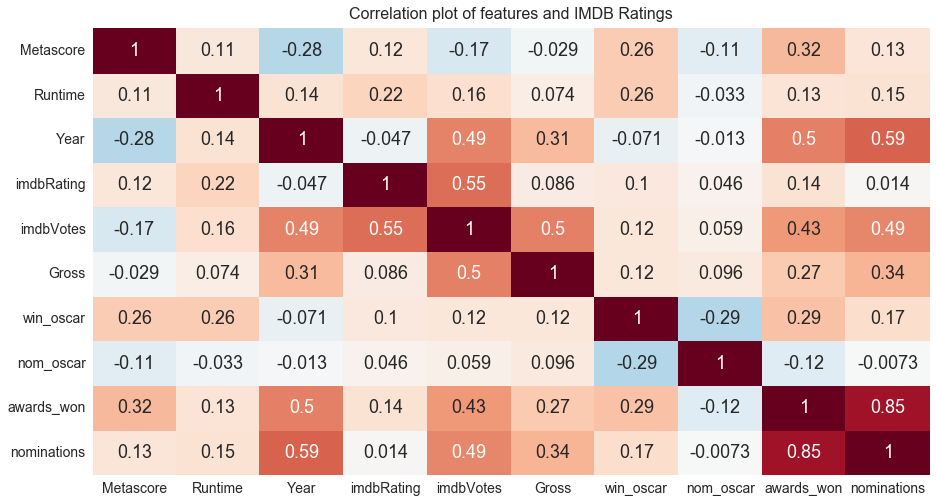

In [406]:
# Correlation plot

import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
ax = sns.heatmap(df.corr(), annot=True, annot_kws={'size': 18}, cbar = False)
ax.set_title('Correlation plot of features and IMDB Ratings', y = 1.01, fontsize = 16)
ax.tick_params(axis = 'both', labelsize = 14)
plt.savefig('proj6_corrplot_award.png');

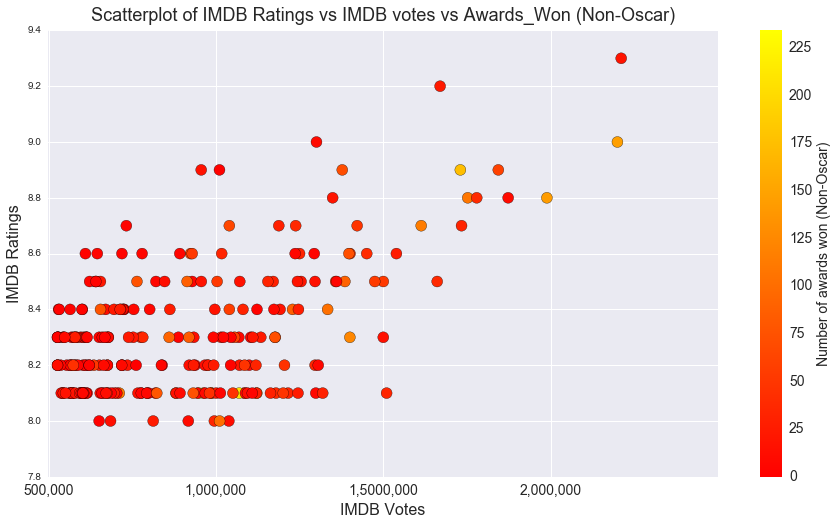

In [418]:
# Scatterplot of votes vs rating

fig, ax = plt.subplots(1,1, figsize = (15,8))

plt.scatter(x= df['imdbVotes'], y = df['imdbRating'], \
             s = 120, c = df['awards_won'], \
                cmap = 'autumn')
ax.set_title('Scatterplot of IMDB Ratings vs IMDB votes vs Awards_Won (Non-Oscar)', y = 1.01, fontsize = 18)
ax.set_xlabel('IMDB Votes', fontsize = 16)
ax.set_xlim(-1000,2000000)
ax.xaxis.set_tick_params(labelbottom = 'on')
ax.set_xticklabels(['0', '500,000', '1,000,000', '1,5000,000', '2,000,000'], fontsize = 14)

ax.set_ylim(7.8,9.4)
ax.set_ylabel("IMDB Ratings", fontsize = 16)

cb = plt.colorbar()
cb.set_label('Number of awards won (Non-Oscar)', rotation = 90, fontsize = 14)
cb.ax.tick_params(labelsize = 14)

plt.savefig('proj6_scatter.png')

In [420]:
df[df['Gross'] > 500000000]

,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Rated,Released,...,Year,imdbID,imdbRating,imdbVotes,Gross,sound,win_oscar,nom_oscar,awards_won,nominations
3,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Won 2 Oscars. Another 146 wins & 142 nominations.,"USA,UK",ChristopherNolan,"Action,Crime,Drama","English, Mandarin",82.0,When the menace known as the Joker wreaks havo...,PG-13,2008-07-18,...,2008,tt0468569,9.0,1699835,533316061.0,dolbydigital sdds dts,2,0,146,142
162,"Harrison Ford, Mark Hamill, Carrie Fisher, Ada...",Nominated for 5 Oscars. Another 47 wins & 104 ...,USA,J.J.Abrams,"Action,Adventure,Fantasy",English,81.0,Three decades after the defeat of the Galactic...,PG-13,2015-12-18,...,2015,tt2488496,8.2,585684,936627416.0,12trackdigitalsound dolbyatmos dolbysurround7...,0,5,47,104
246,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",Nominated for 1 Oscar. Another 34 wins & 75 no...,USA,JossWhedon,"Action,Sci-Fi,Thriller","English, Russian",69.0,Earth's mightiest heroes must come together an...,PG-13,2012-05-04,...,2012,tt0848228,8.1,1010033,623279547.0,datasat dolbydigital dolbysurround7.1,0,1,34,75


## Creating count vectorizer for keywords

In [67]:
# Generic vectorizer

v = CountVectorizer(
    binary=True,  # Create binary features
    stop_words='english', # Ignore common words such as 'the', 'and'
    max_features=50, # Only use the top 50 most common words
)

### Vectorizing Actors

In [68]:
# This builds a matrix with a row per website (or data point) and column per word (using all words in the dataset)
actors = v.fit_transform(df.Actors).todense()

col = v.get_feature_names()

# To differentiate key words
col_n = []

for i in col:
    j = "actor_"+ i    
    col_n.append(j)

actors = pd.DataFrame(actors, columns= col_n)
actors.head()

,actor_al,actor_allen,actor_anthony,actor_ben,actor_bruce,actor_carrie,actor_charles,actor_chris,actor_christopher,actor_clint,...,actor_niro,actor_paul,actor_peter,actor_richard,actor_robert,actor_sean,actor_tim,actor_tom,actor_william,actor_williams
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
actors_df = pd.DataFrame(actors.sum())
actors_df.columns = ['Count']
actors_df.sort_values(['Count'],inplace = True)
actors_df.head()

,Count
actor_keaton,4
actor_al,5
actor_freeman,5
actor_ellen,5
actor_jim,5


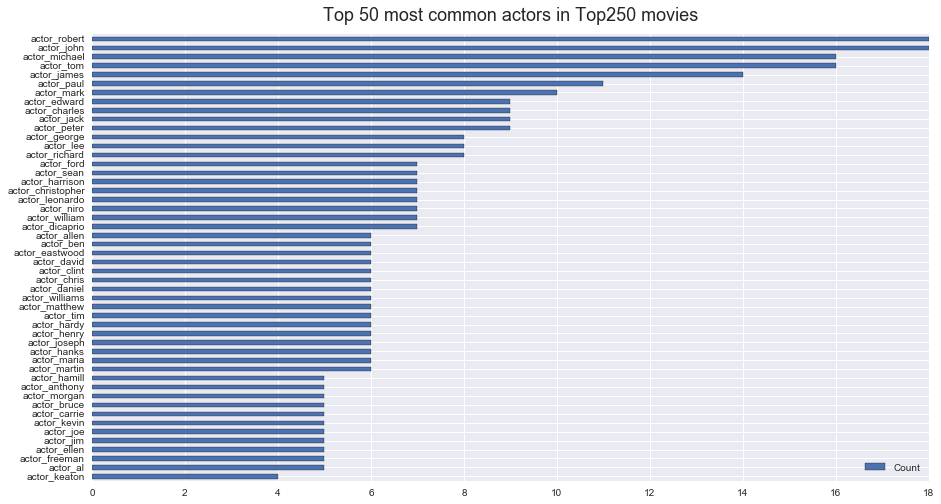

In [284]:
ax = actors_df.plot(kind = 'barh', figsize = (15,8))
ax.set_title('Top 50 most common actors in Top250 movies', fontsize = 18, y = 1.02)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.savefig('proj6_top50_actors.png')

### Vectorizing directors

In [71]:
direct = v.fit_transform(df.Director).todense()

col = v.get_feature_names()

# To differentiate key words
col_n = []

for i in col:
    j = "dir_"+ i    
    col_n.append(j)

direct = pd.DataFrame(direct, columns= col_n)
direct.head()

,dir_akirakurosawa,dir_alejandrog,dir_alfredhitchcock,dir_andrewstanton,dir_billywilder,dir_charleschaplin,dir_christophernolan,dir_clinteastwood,dir_davidfincher,dir_davidlean,...,dir_romanpolanski,dir_ronhoward,dir_sergioleone,dir_sidneylumet,dir_stanleykubrick,dir_stevenspielberg,dir_terrygilliam,dir_terryjones,dir_victorfleming,dir_williamwyler
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


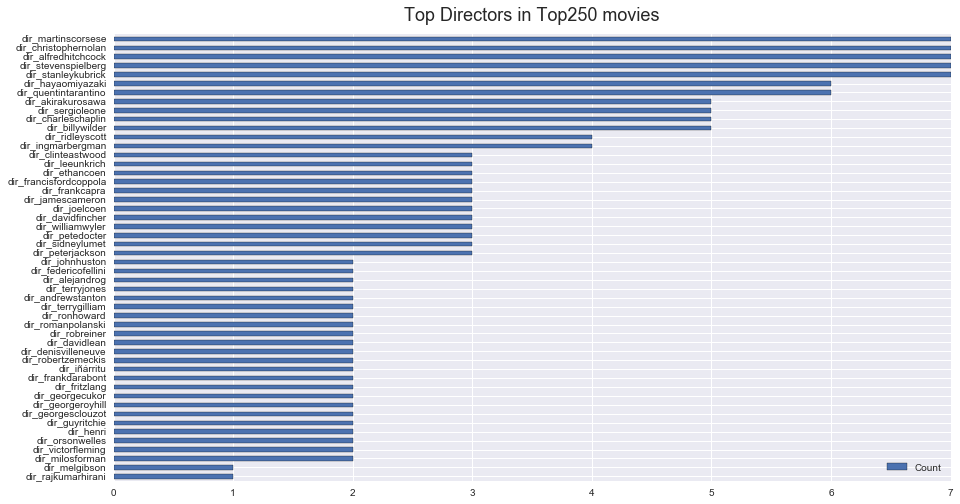

In [285]:
direct_df = pd.DataFrame(direct.sum())
direct_df.columns = ['Count']
direct_df.sort_values(['Count'],inplace = True)
direct_df.head()

ax = direct_df.plot(kind = 'barh', figsize = (15,8))
ax.set_title('Top Directors in Top250 movies', fontsize = 18, y = 1.02)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.savefig('proj6_top_directors.png')

### Vectorizing genres

In [73]:
genre = v.fit_transform(df.Genre).todense()

col = v.get_feature_names()

# To differentiate key words
col_n = []

for i in col:
    j = "genre_"+ i    
    col_n.append(j)

genre = pd.DataFrame(genre, columns= col_n)
genre.head()

,genre_action,genre_adventure,genre_animation,genre_biography,genre_comedy,genre_crime,genre_drama,genre_family,genre_fantasy,genre_fi,...,genre_music,genre_musical,genre_mystery,genre_noir,genre_romance,genre_sci,genre_sport,genre_thriller,genre_war,genre_western
0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Vectorizing Language

In [74]:
lang = v.fit_transform(df.Language).todense()

col = v.get_feature_names()

lang = pd.DataFrame(lang, columns= col)
lang.head()

,american,arabic,awadhi,belarusian,cantonese,czech,danish,english,esperanto,french,...,spanish,swahili,swedish,thai,turkish,urdu,vietnamese,xhosa,yiddish,zulu
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Vectorizing Plot

In [75]:
plot = v.fit_transform(df.Plot).todense()

col = v.get_feature_names()

# To differentiate key words
col_n = []

for i in col:
    j = "plot_"+ i    
    col_n.append(j)

plot = pd.DataFrame(plot, columns= col_n)
plot.head()

,plot_american,plot_boy,plot_child,plot_city,plot_corruption,plot_crime,plot_dead,plot_empire,plot_family,plot_father,...,plot_tries,plot_war,plot_way,plot_wife,plot_woman,plot_work,plot_world,plot_year,plot_years,plot_young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


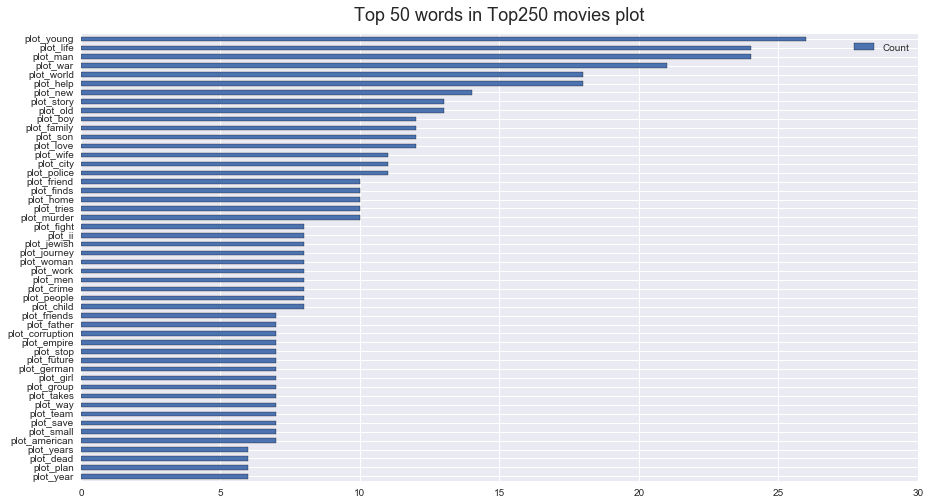

In [286]:
plot_df = pd.DataFrame(plot.sum())
plot_df.columns = ['Count']
plot_df.sort_values(['Count'],inplace = True)

ax = plot_df.plot(kind = 'barh', figsize = (15,8))
ax.set_title('Top 50 words in Top250 movies plot', fontsize = 18, y = 1.02)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.savefig('proj6_top_words_in_plot.png')

### Vectorizing titles

In [77]:
title = v.fit_transform(df.Title).todense()

col = v.get_feature_names()

# To differentiate key words
col_n = []

for i in col:
    j = "title_"+ i    
    col_n.append(j)

title = pd.DataFrame(title, columns= col_n)
title.head()

,title_12,title_american,title_beautiful,title_beauty,title_castle,title_city,title_dark,title_day,title_dog,title_dollars,...,title_sunrise,title_terminator,title_time,title_toy,title_train,title_wall,title_wars,title_wild,title_wind,title_years
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


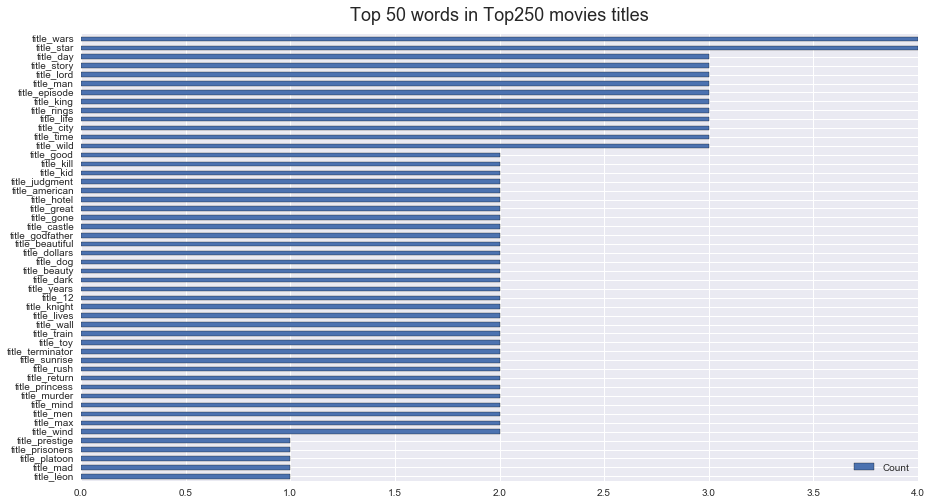

In [287]:
title_df = pd.DataFrame(title.sum())
title_df.columns = ['Count']
title_df.sort_values(['Count'],inplace = True)

ax = title_df.plot(kind = 'barh', figsize = (15,8))
ax.set_title('Top 50 words in Top250 movies titles', fontsize = 18, y = 1.02)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.savefig('proj6_top_words_in_title.png')

### Vectorizing countries

In [79]:
country = v.fit_transform(df.Country).todense()

col = v.get_feature_names()

country = pd.DataFrame(country, columns= col)
country.head()

,algeria,argentina,australia,austria,belgium,brazil,canada,china,denmark,france,...,southkorea,sovietunion,spain,sweden,switzerland,taiwan,uk,unitedarabemirates,usa,westgermany
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


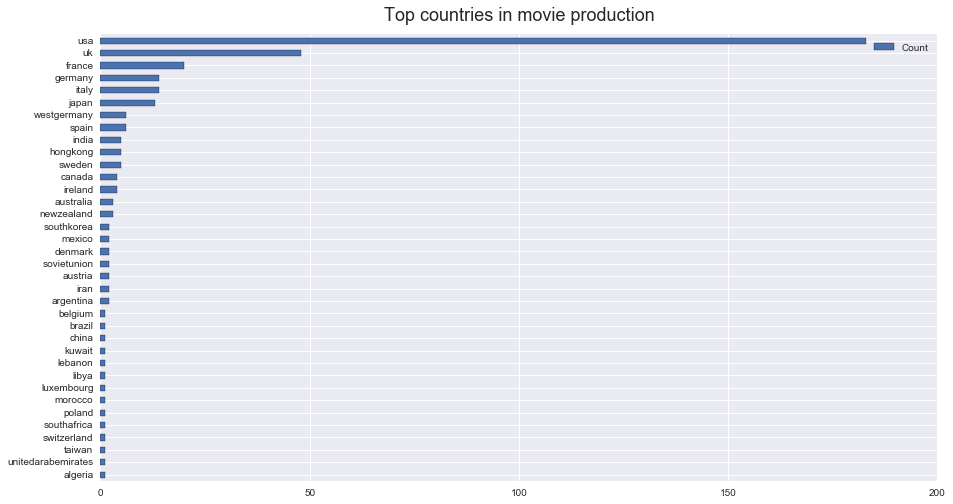

In [288]:
country_df = pd.DataFrame(country.sum())
country_df.columns = ['Count']
country_df.sort_values(['Count'],inplace = True)

ax = country_df.plot(kind = 'barh', figsize = (15,8))
ax.set_title('Top countries in movie production', fontsize = 18, y = 1.02)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.savefig('proj6_top_countries_movies.png')

### Vectorizing sound column

In [81]:
sound = v.fit_transform(df.sound).todense()

col = v.get_feature_names()

sound = pd.DataFrame(sound, columns= col)
sound.head()

,12trackdigitalsound,4trackstereo,6trackstereo,70mm6track,agasoundsystem,auro11,cds,datasat,dolby,dolbyatmos,...,dts70mm,dtses,dtsstereo,imax6track,mono,perspectastereo,sdds,silent,sonicsddp,stereo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


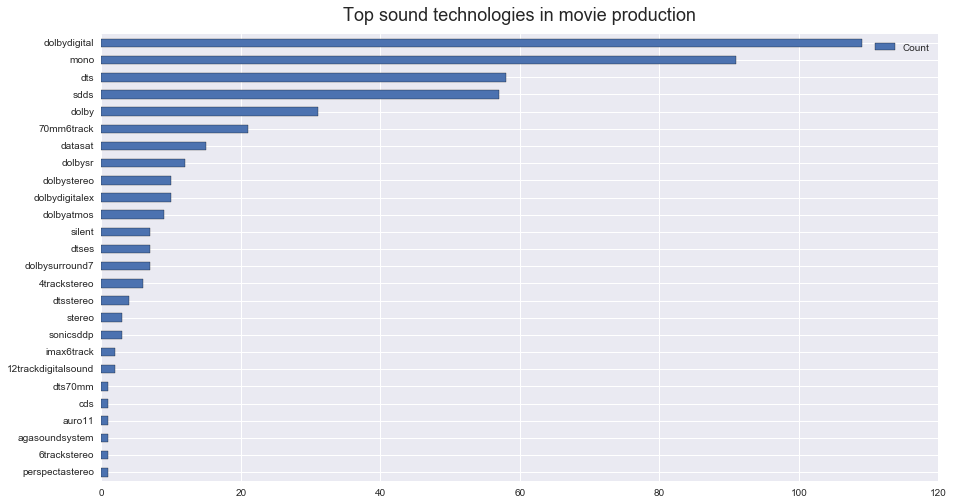

In [289]:
sound_df = pd.DataFrame(sound.sum())
sound_df.columns = ['Count']
sound_df.sort_values(['Count'],inplace = True)

ax = sound_df.plot(kind = 'barh', figsize = (15,8))
ax.set_title('Top sound technologies in movie production', fontsize = 18, y = 1.02)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.savefig('proj6_top_sound_in_movies.png')

### Get dummy variables for categorical columns

In [83]:
df.head(1)

,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Rated,Released,...,Year,imdbID,imdbRating,imdbVotes,Gross,sound,win_oscar,nom_oscar,awards_won,nominations
0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Nominated for 7 Oscars. Another 18 wins & 30 n...,USA,FrankDarabont,"Crime,Drama",English,80.0,Two imprisoned men bond over a number of years...,R,1994-10-14,...,1994,tt0111161,9.3,1711064,28341469.0,dolbydigital,0,7,18,30


In [84]:
df_rate = pd.get_dummies(df['Rated'])

#Dropping "N/A" column
del df_rate['N/A']
df_rate.head()

,APPROVED,G,M,NOT RATED,PASSED,PG,PG-13,R,UNRATED
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Concatenating all columns together

#### Selecting continuous columns from df

In [85]:
df.loc[:, ['nom_oscar', 'awards_won']] = df[['nom_oscar', 'awards_won']].astype(int)

In [86]:
want_list = ['Metascore', 'Year', 'Runtime', \
             'imdbVotes', 'Gross', 'win_oscar', \
             'nom_oscar', 'awards_won', 'nominations']

In [87]:
# Showing number of rows with NaN values within Gross column

len(df[df['Gross'].isnull()])

66

In [89]:
# Using median and MAD since there are outliers in the dataset

a = df['Gross'].median()

In [90]:
b = df['Gross'].mad()

In [91]:
df.loc[:, 'Gross'] = df['Gross'].apply(lambda x:x if x > 0 else abs(a + (np.random.normal() * b)))

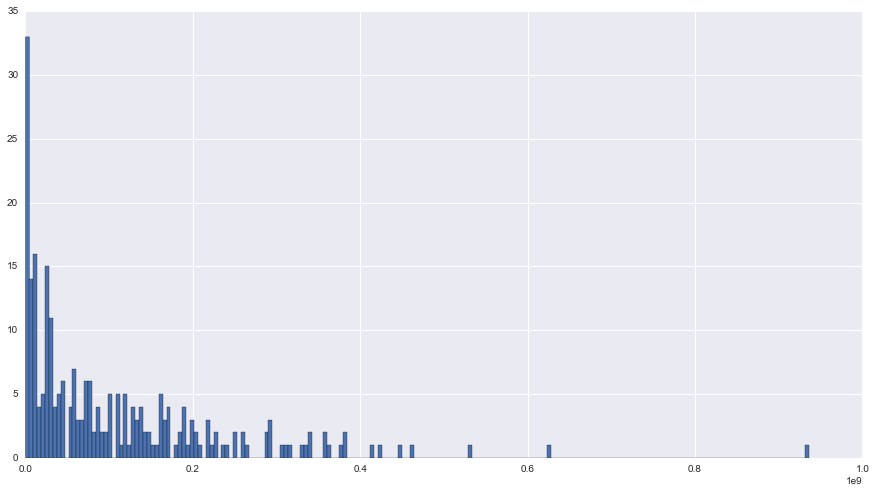

In [92]:
df['Gross'].hist(figsize = (15,8), bins = 200)

In [93]:
a = df['Metascore'].mean()
b = df['Metascore'].std()

df.loc[:, 'Metascore'] = df['Metascore'].apply(lambda x:x if x > 0 else abs(a + (np.random.normal() * b)))

In [94]:
# Showing number of rows with NaN values within Metascore column

len(df[df['Metascore'].isnull()])

0

In [95]:
df[want_list].dtypes

Metascore      float64
Year             int64
Runtime          int64
imdbVotes        int64
Gross          float64
win_oscar        int64
nom_oscar        int64
awards_won       int64
nominations      int64
dtype: object

#### Scaling continuous columns

In [96]:
scaler = StandardScaler()
df.loc[:, want_list] = scaler.fit_transform(df[want_list])

In [97]:
# We need to concatenate the following

# Scaled original df with only columns from "want_list"
# actors df (actors)
# directors df (direct)
# genre df
# lang df
# plot df
# title df
# country df
# sound df
# df_rate

# target is IMDBratings

y = df['imdbRating']

In [98]:
X = pd.concat([df[want_list], actors, direct, genre, lang, plot, title, country, sound, df_rate], axis=1)
X.head()

,Metascore,Year,Runtime,imdbVotes,Gross,win_oscar,nom_oscar,awards_won,nominations,actor_al,...,stereo,APPROVED,G,M,NOT RATED,PASSED,PG,PG-13,R,UNRATED
0,0.011241,0.411549,0.393989,3.840164,-0.620765,-0.598063,3.834777,-0.284891,-0.129058,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.900284,-0.497130,1.409426,2.240251,0.232093,0.863004,-0.489231,-0.145403,-0.191870,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.011241,-0.414523,2.240238,1.148034,-0.388821,2.324071,-0.489231,-0.508072,-0.338432,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.200145,0.989800,0.701698,3.806966,3.423840,0.375981,-0.489231,3.286008,2.215927,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.964681,-1.116684,-1.021468,0.129590,-0.164506,-0.598063,1.363915,-0.340686,-0.589680,0,...,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
X.shape

(250, 350)

## Modelling

In [100]:
from sklearn.cross_validation import cross_val_score, KFold, cross_val_predict

from sklearn.grid_search import GridSearchCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [101]:
rand_state = 4

In [102]:
model_list = [
    
    ('DecisionTreeRegressor',DecisionTreeRegressor(random_state=rand_state)),
    ('RandomForestRegressor', RandomForestRegressor(random_state=rand_state)),
    ('ExtraTreesRegressor', ExtraTreesRegressor(random_state=rand_state)),
    ('GradientBoostingRegressor', GradientBoostingRegressor(random_state=rand_state)),
    ('AdaBoostRegressor', AdaBoostRegressor(random_state=rand_state))
]

## Trying vanilla models

In [103]:
def plain_model(clf):
    score = cross_val_score(clf, X, y, scoring='neg_mean_squared_error', cv = 10)
    return score

In [115]:
# Consolidating model performances
model_performance = []

for i in model_list:
    result = plain_model(i[1])
    model_performance.append([i[0], abs(result.mean()), result.std()])

In [116]:
# Converting performance list into dataframe

mp_df = pd.DataFrame(model_performance, columns = ['ML Model', 'MSE Mean', 'MSE Std'])
mp_df.sort_values('MSE Mean', ascending = True, inplace= True)
mp_df

,ML Model,MSE Mean,MSE Std
3,GradientBoostingRegressor,0.041811,0.049382
1,RandomForestRegressor,0.045645,0.057821
4,AdaBoostRegressor,0.049644,0.071840
2,ExtraTreesRegressor,0.051576,0.056478
0,DecisionTreeRegressor,0.060080,0.042772


## Introducing bagging

In [117]:
# Default bagging

for i in model_list:
    result = plain_model(BaggingRegressor(i[1], random_state=rand_state))
    model_performance.append([i[0] + "+ Bagging", abs(result.mean()), result.std()])

In [118]:
mp_df = pd.DataFrame(model_performance, columns = ['ML Model', 'MSE Mean', 'MSE Std'])
mp_df.sort_values('MSE Mean', ascending = True, inplace= True)
mp_df

,ML Model,MSE Mean,MSE Std
3,GradientBoostingRegressor,0.041811,0.049382
5,DecisionTreeRegressor+ Bagging,0.042672,0.053121
8,GradientBoostingRegressor+ Bagging,0.043429,0.058217
6,RandomForestRegressor+ Bagging,0.045234,0.061739
1,RandomForestRegressor,0.045645,0.057821
9,AdaBoostRegressor+ Bagging,0.047191,0.066925
4,AdaBoostRegressor,0.049644,0.071840
2,ExtraTreesRegressor,0.051576,0.056478
7,ExtraTreesRegressor+ Bagging,0.052365,0.072935
0,DecisionTreeRegressor,0.060080,0.042772


## Introducing GridSearchCV

In [119]:
# DecisionTreeRegressor + Bagging + GridSearchCV

params = {
    'min_samples_split' : np.arange(2, 5, 1), \
    'min_samples_leaf' : np.arange(1, 5, 1), \
    'max_features' : np.arange(0.7, 1.0, 0.05), \
    'presort' : [True, False]
}

gsdt = GridSearchCV(DecisionTreeRegressor(random_state = rand_state), param_grid=params, \
                    scoring='neg_mean_squared_error', cv = 5)

In [120]:
gsdt.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=4,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_split': array([2, 3, 4]), 'max_features': array([ 0.7 ,  0.75,  0.8 ,  0.85,  0.9 ,  0.95,  1.  ]), 'presort': [True, False], 'min_samples_leaf': array([1, 2, 3, 4])},
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_squared_error', verbose=0)

In [121]:
gsdt.best_params_

{'max_features': 0.80000000000000004,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'presort': True}

In [122]:
result = plain_model(gsdt.best_estimator_)
model_performance.append(['Dt_with_GSCV', abs(result.mean()), result.std()])

mp_df = pd.DataFrame(model_performance, columns = ['ML Model', 'MSE Mean', 'MSE Std'])
mp_df.sort_values('MSE Mean', ascending = True, inplace= True)
mp_df

,ML Model,MSE Mean,MSE Std
3,GradientBoostingRegressor,0.041811,0.049382
5,DecisionTreeRegressor+ Bagging,0.042672,0.053121
8,GradientBoostingRegressor+ Bagging,0.043429,0.058217
6,RandomForestRegressor+ Bagging,0.045234,0.061739
1,RandomForestRegressor,0.045645,0.057821
9,AdaBoostRegressor+ Bagging,0.047191,0.066925
4,AdaBoostRegressor,0.049644,0.071840
10,Dt_with_GSCV,0.050398,0.040471
2,ExtraTreesRegressor,0.051576,0.056478
7,ExtraTreesRegressor+ Bagging,0.052365,0.072935


In [123]:
# RandomForestRegressor  + GridSearchCV

params = {
    'n_estimators' : np.arange(18,25,1), 
    'min_samples_split' : np.arange(5, 8, 1), 
    'max_features' : np.arange(0.8,1,0.02),
}

gsrf = GridSearchCV(RandomForestRegressor(random_state = rand_state, criterion='mse'), param_grid=params, \
                    scoring='neg_mean_squared_error', cv = 5)

In [124]:
gsrf.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=4,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([18, 19, 20, 21, 22, 23, 24]), 'min_samples_split': array([5, 6, 7]), 'max_features': array([ 0.8 ,  0.82,  0.84,  0.86,  0.88,  0.9 ,  0.92,  0.94,  0.96,  0.98])},
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_squared_error', verbose=0)

In [125]:
gsrf.best_params_

{'max_features': 0.88000000000000012,
 'min_samples_split': 5,
 'n_estimators': 18}

In [128]:
result = plain_model(gsrf.best_estimator_)
model_performance.append(['RF_with_GSCV', abs(result.mean()), result.std()])

mp_df = pd.DataFrame(model_performance, columns = ['ML Model', 'MSE Mean', 'MSE Std'])
mp_df.sort_values('MSE Mean', ascending = True, inplace= True)
mp_df

,ML Model,MSE Mean,MSE Std
3,GradientBoostingRegressor,0.041811,0.049382
11,RF_with_GSCV,0.041992,0.054915
5,DecisionTreeRegressor+ Bagging,0.042672,0.053121
8,GradientBoostingRegressor+ Bagging,0.043429,0.058217
6,RandomForestRegressor+ Bagging,0.045234,0.061739
1,RandomForestRegressor,0.045645,0.057821
9,AdaBoostRegressor+ Bagging,0.047191,0.066925
4,AdaBoostRegressor,0.049644,0.071840
10,Dt_with_GSCV,0.050398,0.040471
2,ExtraTreesRegressor,0.051576,0.056478


In [129]:
# GradientBoostingRegressor + GridSearchCV

params = {
    'loss' : ['ls', 'huber'],
    'n_estimators' : np.arange(400,600, 50),
    'max_depth' : np.arange(2,4,1)
}

gsgb = GridSearchCV(GradientBoostingRegressor(random_state = rand_state, criterion='mse'), param_grid=params, \
                    scoring='neg_mean_squared_error', cv = 5)

In [130]:
gsgb.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=4, subsample=1.0, verbose=0,
             warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([400, 450, 500, 550]), 'loss': ['ls', 'huber'], 'max_depth': array([2, 3])},
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_squared_error', verbose=0)

In [131]:
gsgb.best_params_

{'loss': 'ls', 'max_depth': 3, 'n_estimators': 550}

In [132]:
result = plain_model(gsgb.best_estimator_)
model_performance.append(['GB_with_GSCV', abs(result.mean()), result.std()])

mp_df = pd.DataFrame(model_performance, columns = ['ML Model', 'MSE Mean', 'MSE Std'])
mp_df.sort_values('MSE Mean', ascending = True, inplace= True)
mp_df

,ML Model,MSE Mean,MSE Std
12,GB_with_GSCV,0.040403,0.044932
3,GradientBoostingRegressor,0.041811,0.049382
11,RF_with_GSCV,0.041992,0.054915
5,DecisionTreeRegressor+ Bagging,0.042672,0.053121
8,GradientBoostingRegressor+ Bagging,0.043429,0.058217
6,RandomForestRegressor+ Bagging,0.045234,0.061739
1,RandomForestRegressor,0.045645,0.057821
9,AdaBoostRegressor+ Bagging,0.047191,0.066925
4,AdaBoostRegressor,0.049644,0.071840
10,Dt_with_GSCV,0.050398,0.040471


In [133]:
# Setting the best gradient boost model

gb_best = gsgb.best_estimator_

In [134]:
gb_features = pd.DataFrame(gb_best.feature_importances_, index = X.columns, columns = ['Importance'])
gb_features.sort_values('Importance', ascending = False, inplace = True)

# Showing top 10 most important features
gb_features.head(10)

,Importance
imdbVotes,0.098661
Gross,0.053221
Metascore,0.050360
Year,0.049394
Runtime,0.048183
nominations,0.041694
awards_won,0.033350
win_oscar,0.014933
nom_oscar,0.014445
dolby,0.011695


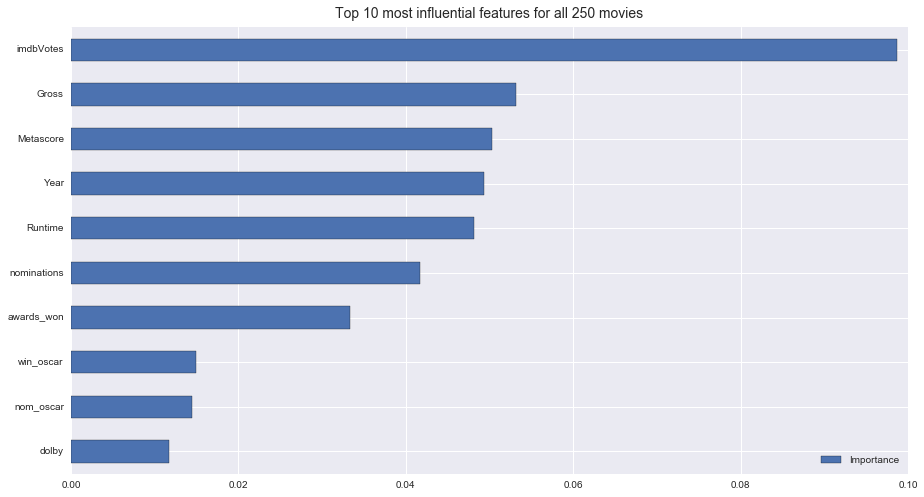

In [135]:
# Plotting feature importance

ax = gb_features.head(10).sort_values('Importance').plot(kind = 'barh', figsize = (15,8))
ax.set_title('Top 10 most influential features for all 250 movies', y = 1.01, size = 14)

## Modelling without outliers (Gross)

In [136]:
# Getting movies that are more than 3sd higher than the mean gross
# Removing outliers above 99.5th percentile

df[df['Gross'] > (df['Gross'].mean() + (3 * df['Gross'].std()))]

,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Rated,Released,...,Year,imdbID,imdbRating,imdbVotes,Gross,sound,win_oscar,nom_oscar,awards_won,nominations
3,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Won 2 Oscars. Another 146 wins & 142 nominations.,"USA,UK",ChristopherNolan,"Action,Crime,Drama","English, Mandarin",0.200145,When the menace known as the Joker wreaks havo...,PG-13,2008-07-18,...,0.989800,tt0468569,9.0,3.806966,3.423840,dolbydigital sdds dts,0.375981,-0.489231,3.286008,2.215927
162,"Harrison Ford, Mark Hamill, Carrie Fisher, Ada...",Nominated for 5 Oscars. Another 47 wins & 104 ...,USA,J.J.Abrams,"Action,Adventure,Fantasy",English,0.105693,Three decades after the defeat of the Galactic...,PG-13,2015-12-18,...,1.278925,tt2488496,8.2,0.513033,6.654170,12trackdigitalsound dolbyatmos dolbysurround7...,-0.598063,2.599346,0.524141,1.420307
246,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",Nominated for 1 Oscar. Another 34 wins & 75 no...,USA,JossWhedon,"Action,Sci-Fi,Thriller","English, Russian",-1.027733,Earth's mightiest heroes must come together an...,PG-13,2012-05-04,...,1.155014,tt0848228,8.1,1.767600,4.144404,datasat dolbydigital dolbysurround7.1,-0.598063,0.128485,0.161472,0.813124


In [137]:
# No shows on the other end of the spectrum, i.e. 0.5th percentile

df[df['Gross'] < (df['Gross'].mean() - (3 * df['Gross'].std()))]

,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Rated,Released,...,Year,imdbID,imdbRating,imdbVotes,Gross,sound,win_oscar,nom_oscar,awards_won,nominations


In [138]:
X_99 = X[X['Gross'] < (X['Gross'].mean() + (3 * X['Gross'].std()))]

In [139]:
y_99 = y.copy()

In [140]:
y_99.drop([3,160,246], inplace=True)

In [147]:
params = {
    'loss' : ['ls', 'huber'],
    'n_estimators' : np.arange(500,600, 10),
    'max_depth' : np.arange(2,6,1)
}

gsgb = GridSearchCV(GradientBoostingRegressor(random_state = rand_state, criterion='mse'), param_grid=params, \
                    scoring='neg_mean_squared_error', cv = 5)

In [148]:
gsgb.fit(X_99, y_99)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=4, subsample=1.0, verbose=0,
             warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([500, 510, 520, 530, 540, 550, 560, 570, 580, 590]), 'loss': ['ls', 'huber'], 'max_depth': array([2, 3, 4, 5])},
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_squared_error', verbose=0)

In [149]:
gsgb.best_params_

{'loss': 'huber', 'max_depth': 5, 'n_estimators': 590}

In [150]:
gb99_best = gsgb.best_estimator_

In [153]:
score = cross_val_score(gb99_best, X_99, y_99, scoring='neg_mean_squared_error', cv = 10)

model_performance.append(['GB_99_with_GSCV', abs(score.mean()), score.std()])

mp_df = pd.DataFrame(model_performance, columns = ['ML Model', 'MSE Mean', 'MSE Std'])
mp_df.sort_values('MSE Mean', ascending = True, inplace= True)
mp_df

,ML Model,MSE Mean,MSE Std
13,GB_99_with_GSCV,0.036407,0.040316
12,GB_with_GSCV,0.040403,0.044932
3,GradientBoostingRegressor,0.041811,0.049382
11,RF_with_GSCV,0.041992,0.054915
5,DecisionTreeRegressor+ Bagging,0.042672,0.053121
8,GradientBoostingRegressor+ Bagging,0.043429,0.058217
6,RandomForestRegressor+ Bagging,0.045234,0.061739
1,RandomForestRegressor,0.045645,0.057821
9,AdaBoostRegressor+ Bagging,0.047191,0.066925
4,AdaBoostRegressor,0.049644,0.071840


In [154]:
gb99_features = pd.DataFrame(gb99_best.feature_importances_, index = X.columns, columns = ['Importance'])
gb99_features.sort_values('Importance', ascending = False, inplace = True)
gb99_features.head(10)

,Importance
imdbVotes,0.071666
Gross,0.066954
Metascore,0.043377
Year,0.041765
awards_won,0.037832
Runtime,0.036397
nominations,0.030170
nom_oscar,0.014491
title_dollars,0.010837
genre_sport,0.010115


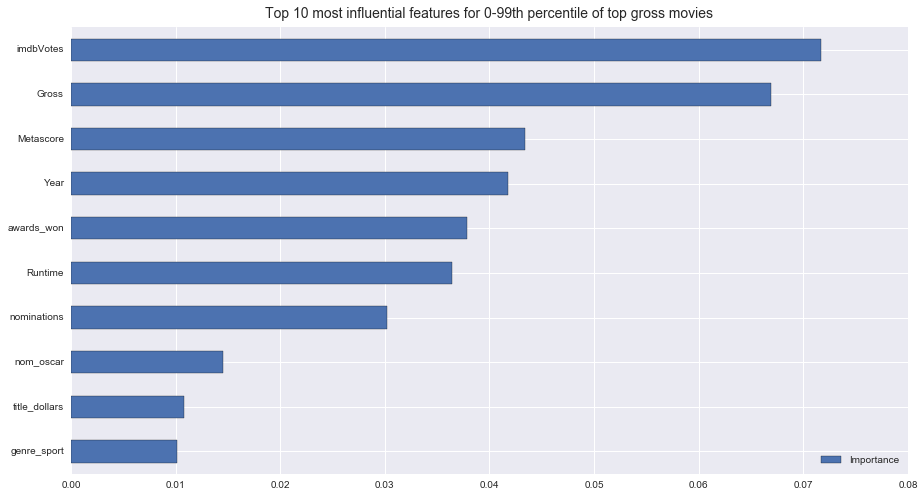

In [290]:
# Plotting feature importance

ax = gb99_features.head(10).sort_values('Importance').plot(kind = 'barh', figsize = (15,8))
ax.set_title('Top 10 most influential features for 0-99th percentile of top gross movies', y = 1.01, size = 14)
plt.savefig('proj6_top10_feature_99.png')


## Comments:

It seems like "IMDB Votes" is a direct determinant of the IMDB ratings. And intuitively, metascores should be directly correlated with IMDB ratings.

## Correlation

In [280]:
df[['imdbRating','imdbVotes', 'Metascore']].corr()

,imdbRating,imdbVotes,Metascore
imdbRating,1.000000,0.554798,0.093626
imdbVotes,0.554798,1.000000,-0.106001
Metascore,0.093626,-0.106001,1.000000


## Removing movies over 99th percentile gross and "IMDB votes" + "Metascore" columns

In [156]:
X_99_no_vote = X_99.copy()

In [157]:
del X_99_no_vote['imdbVotes']
del X_99_no_vote['Metascore']

In [158]:
y_99_no_vote = y_99.copy()

In [166]:
params = {
    'loss' : ['ls', 'huber'],
    'n_estimators' : np.arange(500,590, 10),
    'max_depth' : np.arange(4,7,1)
}

gsgb = GridSearchCV(GradientBoostingRegressor(random_state = rand_state, criterion='mse'), param_grid=params, \
                    scoring='neg_mean_squared_error', cv = 5)

In [167]:
gsgb.fit(X_99_no_vote,y_99_no_vote)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=4, subsample=1.0, verbose=0,
             warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([500, 510, 520, 530, 540, 550, 560, 570, 580]), 'loss': ['ls', 'huber'], 'max_depth': array([4, 5, 6])},
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_squared_error', verbose=0)

In [161]:
gsgb.best_params_

{'loss': 'huber', 'max_depth': 5, 'n_estimators': 580}

In [162]:
gsgb_99_no_vote = gsgb.best_estimator_

In [165]:
score = cross_val_score(gsgb_99_no_vote, X_99_no_vote, y_99_no_vote, scoring='neg_mean_squared_error', cv = 10)

model_performance.append(['GB_99_no_vote_with_GSCV', abs(score.mean()), score.std()])


#result = plain_model(gsgb_99_no_vote)
#model_performance.append(['GB_99_no_vote_with_GSCV', result.mean(), result.std()])

mp_df = pd.DataFrame(model_performance, columns = ['ML Model', 'MSE Mean', 'MSE Std'])
mp_df.sort_values('MSE Mean', ascending = True, inplace= True)
mp_df

,ML Model,MSE Mean,MSE Std
13,GB_99_with_GSCV,0.036407,0.040316
12,GB_with_GSCV,0.040403,0.044932
3,GradientBoostingRegressor,0.041811,0.049382
11,RF_with_GSCV,0.041992,0.054915
5,DecisionTreeRegressor+ Bagging,0.042672,0.053121
8,GradientBoostingRegressor+ Bagging,0.043429,0.058217
6,RandomForestRegressor+ Bagging,0.045234,0.061739
1,RandomForestRegressor,0.045645,0.057821
9,AdaBoostRegressor+ Bagging,0.047191,0.066925
4,AdaBoostRegressor,0.049644,0.071840


In [168]:
gsgb_99_no_vote_features = pd.DataFrame(gsgb_99_no_vote.feature_importances_, index = X_99_no_vote.columns, columns = ['Importance'])
gsgb_99_no_vote_features.sort_values('Importance', ascending = False, inplace = True)
gsgb_99_no_vote_features.head(10)

,Importance
Gross,0.059355
Runtime,0.053668
nominations,0.049337
awards_won,0.037961
Year,0.035703
nom_oscar,0.021023
win_oscar,0.014799
dir_milosforman,0.013433
title_12,0.012995
dir_sidneylumet,0.010652


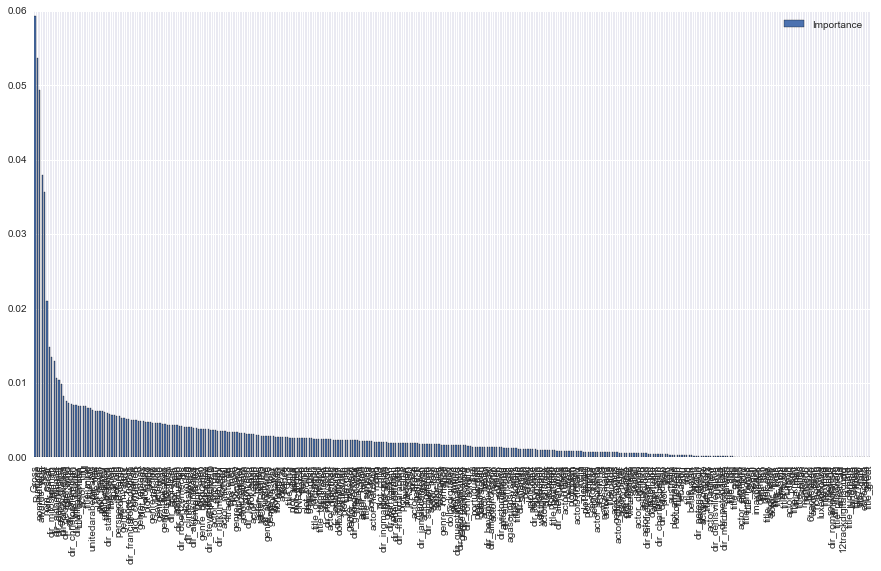

In [267]:
gsgb_99_no_vote_features.plot(kind = 'bar', figsize = (15,8))

## Comments:

From the chart above, feature importance falls sharply to below 1% influence really quickly, i.e. only a few of the top features mattered.

In [274]:
gsgb_99_no_vote_features.reset_index(inplace = True)
gsgb_99_no_vote_features.head(25)

,index,Importance
0,Gross,0.059355
1,Runtime,0.053668
2,nominations,0.049337
3,awards_won,0.037961
4,Year,0.035703
5,nom_oscar,0.021023
6,win_oscar,0.014799
7,dir_milosforman,0.013433
8,title_12,0.012995
9,dir_sidneylumet,0.010652


## Comments:

- Top 11 or 12 features (above 0.01 importance), belongs to more user rated features such as awards nominated and won, revenue grossed.

- Directors started to feature strongly after 8th position (8 out of 17 features)

- Genre only featured once in top 25 features, at 12th position.

- Choice words in title featured strongly from 9th position onwards (6 out of 16 features)

### Interesting notes:

- Actors started to feature from 21st position onwards.

- Winning oscar had lower importance compared to just getting nominated (0.021 compared to 0.015)

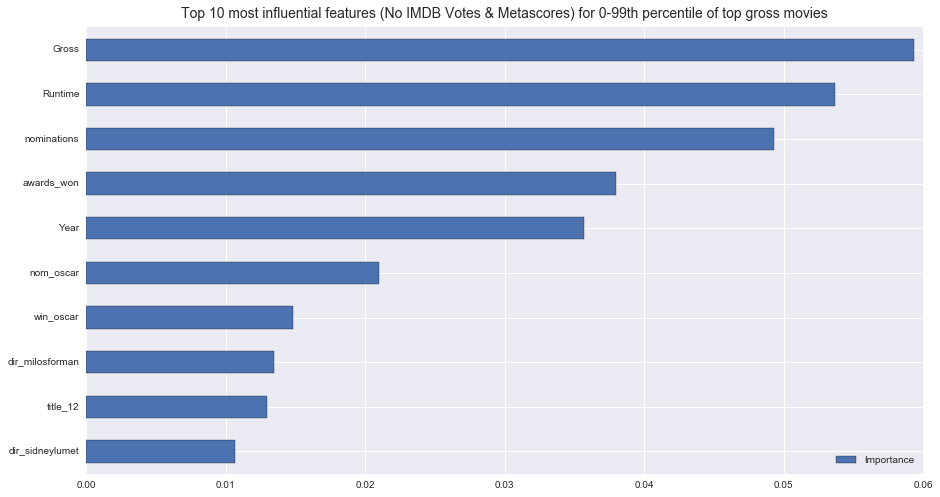

In [169]:
# Plotting feature importance

ax = gsgb_99_no_vote_features.head(10).sort_values('Importance').plot(kind = 'barh', figsize = (15,8))
ax.set_title('Top 10 most influential features (No IMDB Votes & Metascores) for 0-99th percentile of top gross movies', y = 1.01, size = 14)

## Checking the performance for only top 25 features (without IMBD Votes and Metascore)

In [258]:
top25_list = gsgb_99_no_vote_features.head(25).index
top25_list

Index([               u'Gross',              u'Runtime',
                u'nominations',           u'awards_won',
                       u'Year',            u'nom_oscar',
                  u'win_oscar',      u'dir_milosforman',
                   u'title_12',      u'dir_sidneylumet',
           u'dir_davidfincher',          u'genre_drama',
            u'dir_orsonwelles',    u'dir_georgeroyhill',
                 u'title_wind',      u'dir_billywilder',
       u'dir_christophernolan',         u'title_beauty',
           u'dir_williamwyler',       u'title_american',
                  u'actor_tim',                    u'M',
                 u'title_mind',           u'title_kill',
         u'unitedarabemirates'],
      dtype='object')

In [171]:
X_25 = X_99_no_vote[top25_list]

In [172]:
X_25.head()

,Gross,Runtime,nominations,awards_won,Year,nom_oscar,win_oscar,dir_milosforman,title_12,dir_sidneylumet,...,dir_billywilder,dir_christophernolan,title_beauty,dir_williamwyler,title_american,actor_tim,M,title_mind,title_kill,unitedarabemirates
0,-0.620765,0.393989,-0.129058,-0.284891,0.411549,3.834777,-0.598063,0,0,0,...,0,0,0,0,0,1,0.0,0,0,0
1,0.232093,1.409426,-0.191870,-0.145403,-0.497130,-0.489231,0.863004,0,0,0,...,0,0,0,0,0,0,0.0,0,0,0
2,-0.388821,2.240238,-0.338432,-0.508072,-0.414523,-0.489231,2.324071,0,0,0,...,0,0,0,0,0,0,0.0,0,0,0
4,-0.164506,-1.021468,-0.589680,-0.340686,-1.116684,1.363915,-0.598063,0,1,1,...,0,0,0,0,0,0,0.0,0,0,0
5,-0.078314,2.024842,-0.066246,1.193684,0.370246,-0.489231,2.811093,0,0,0,...,0,0,0,0,0,0,0.0,0,0,0


In [241]:
params = {
    'loss' : ['ls', 'huber'],
    'n_estimators' : np.arange(140,145, 1),
    'max_depth' : np.arange(5,8,1)
}

gsgb = GridSearchCV(GradientBoostingRegressor(random_state = rand_state, criterion='mse'), param_grid=params, \
                    scoring='neg_mean_squared_error', cv = 5)

In [242]:
gsgb.fit(X_25,y_99_no_vote)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=4, subsample=1.0, verbose=0,
             warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([140, 141, 142, 143, 144]), 'loss': ['ls', 'huber'], 'max_depth': array([5, 6, 7])},
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_squared_error', verbose=0)

In [243]:
gsgb.best_params_

{'loss': 'ls', 'max_depth': 6, 'n_estimators': 142}

In [244]:
gsgb_25 = gsgb.best_estimator_

In [246]:
score = cross_val_score(gsgb_25, X_25, y_99, scoring='neg_mean_squared_error', cv = 10)

model_performance.append(['GB_99_no_vote_with_GSCV_only25feat', abs(score.mean()), score.std()])

mp_df = pd.DataFrame(model_performance, columns = ['ML Model', 'MSE Mean', 'MSE Std'])
mp_df.sort_values('MSE Mean', ascending = True, inplace= True)
mp_df

,ML Model,MSE Mean,MSE Std
13,GB_99_with_GSCV,0.036407,0.040316
12,GB_with_GSCV,0.040403,0.044932
3,GradientBoostingRegressor,0.041811,0.049382
11,RF_with_GSCV,0.041992,0.054915
5,DecisionTreeRegressor+ Bagging,0.042672,0.053121
8,GradientBoostingRegressor+ Bagging,0.043429,0.058217
6,RandomForestRegressor+ Bagging,0.045234,0.061739
1,RandomForestRegressor,0.045645,0.057821
9,AdaBoostRegressor+ Bagging,0.047191,0.066925
4,AdaBoostRegressor,0.049644,0.071840


In [251]:
np.sqrt(0.052)

0.22803508501982758

In [252]:
mp_df.dtypes

ML Model     object
MSE Mean    float64
MSE Std     float64
dtype: object

In [254]:
mp_df['RMSE'] = mp_df['MSE Mean'].apply(np.sqrt)

In [255]:
mp_df

,ML Model,MSE Mean,MSE Std,RMSE
13,GB_99_with_GSCV,0.036407,0.040316,0.190807
12,GB_with_GSCV,0.040403,0.044932,0.201005
3,GradientBoostingRegressor,0.041811,0.049382,0.204476
11,RF_with_GSCV,0.041992,0.054915,0.204920
5,DecisionTreeRegressor+ Bagging,0.042672,0.053121,0.206573
8,GradientBoostingRegressor+ Bagging,0.043429,0.058217,0.208397
6,RandomForestRegressor+ Bagging,0.045234,0.061739,0.212684
1,RandomForestRegressor,0.045645,0.057821,0.213647
9,AdaBoostRegressor+ Bagging,0.047191,0.066925,0.217235
4,AdaBoostRegressor,0.049644,0.071840,0.222809


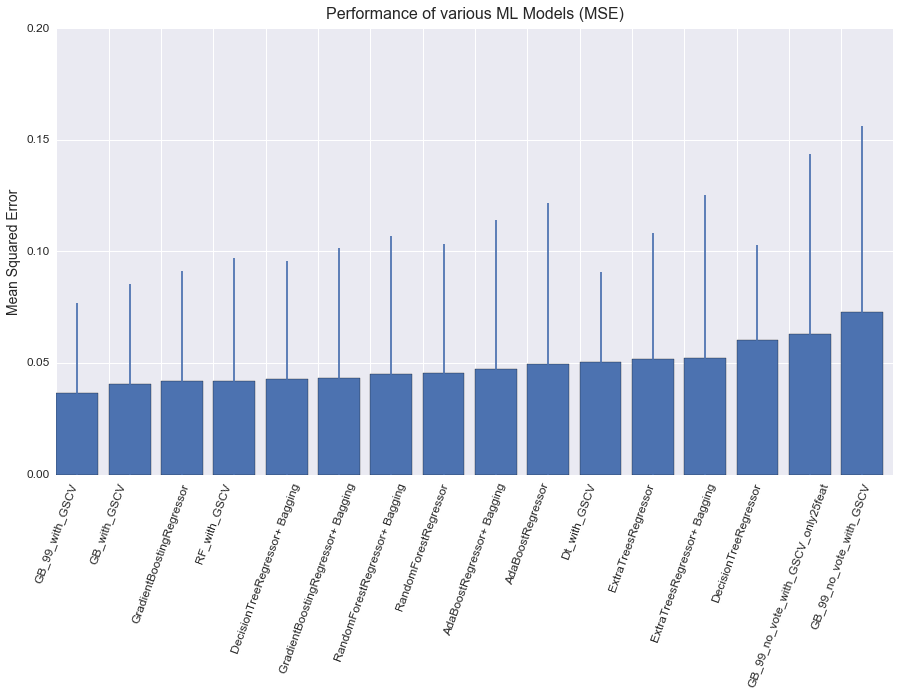

In [247]:
fig, ax = plt.subplots(figsize = (15,8))
rects1 = ax.bar(range(len(mp_df)), mp_df['MSE Mean'],
                yerr=mp_df['MSE Std'],
                tick_label=mp_df['ML Model'])

ax.set_ylabel('Mean Squared Error', fontsize = 14)
ax.set_title('Performance of various ML Models (MSE)', fontsize = 16, y = 1.01)
plt.xticks(rotation=70)
plt.tick_params(axis='both', labelsize = 12)
plt.ylim(0, 0.2)
plt.savefig('proj6_model_performance.png')

## Comments:

Seeing the hit in the performance of the model made me want to try to improve it through manipulating number of features, especially since we saw that feature importance decayed exponentially with position of importance.

In [248]:
# Listing top 10 features of this model

gsgb_25_features = pd.DataFrame(gsgb_25.feature_importances_, index = X_25.columns, columns = ['Importance'])
gsgb_25_features.sort_values('Importance', ascending = False, inplace = True)
gsgb_25_features.head(10)

,Importance
Gross,0.250107
Runtime,0.199351
Year,0.147089
nominations,0.115159
awards_won,0.094269
win_oscar,0.034912
nom_oscar,0.029432
genre_drama,0.026144
actor_tim,0.014429
dir_sidneylumet,0.011700


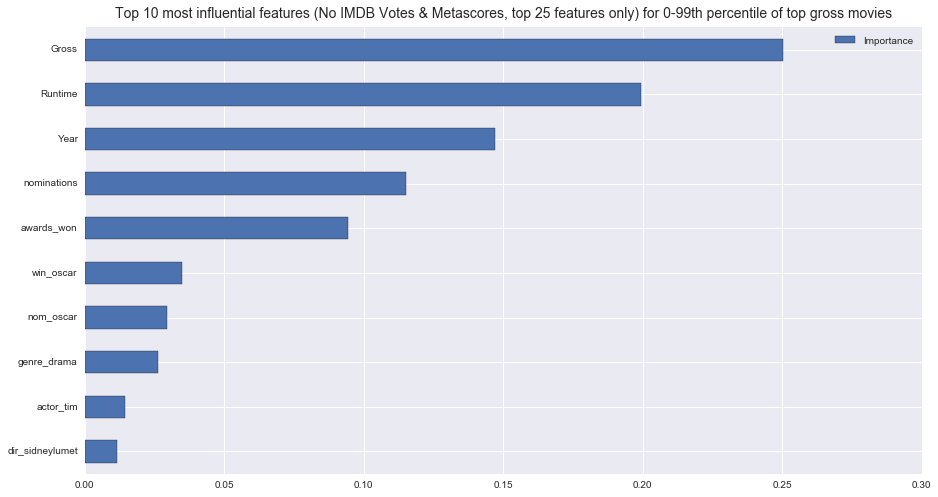

In [291]:
# Plotting feature importance

ax = gsgb_25_features.head(10).sort_values('Importance').plot(kind = 'barh', figsize = (15,8))
ax.set_title('Top 10 most influential features (No IMDB Votes & Metascores, top 25 features only) for 0-99th percentile of top gross movies', y = 1.01, size = 14)
plt.savefig('proj6_top10_features_no_vote.png')

## Checking the performance for only top 15 features (without IMBD Votes and Metascore)

In [259]:
# Top 15 features

top15_list = gsgb_99_no_vote_features.head(15).index
top15_list

Index([            u'Gross',           u'Runtime',       u'nominations',
              u'awards_won',              u'Year',         u'nom_oscar',
               u'win_oscar',   u'dir_milosforman',          u'title_12',
         u'dir_sidneylumet',  u'dir_davidfincher',       u'genre_drama',
         u'dir_orsonwelles', u'dir_georgeroyhill',        u'title_wind'],
      dtype='object')

In [262]:
gsgb.fit(X_15,y_99_no_vote)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=4, subsample=1.0, verbose=0,
             warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([140, 141, 142, 143, 144]), 'loss': ['ls', 'huber'], 'max_depth': array([5, 6, 7])},
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_squared_error', verbose=0)

In [261]:
X_15 = X_99_no_vote[top15_list]

In [263]:
gsgb.best_params_

{'loss': 'ls', 'max_depth': 5, 'n_estimators': 142}

In [264]:
gsgb_15 = gsgb.best_estimator_

In [265]:
score = cross_val_score(gsgb_15, X_15, y_99, scoring='neg_mean_squared_error', cv = 10)

model_performance.append(['GB_99_no_vote_with_GSCV_only15feat', abs(score.mean()), score.std()])

mp_df = pd.DataFrame(model_performance, columns = ['ML Model', 'MSE Mean', 'MSE Std'])
mp_df.sort_values('MSE Mean', ascending = True, inplace= True)
mp_df

,ML Model,MSE Mean,MSE Std
13,GB_99_with_GSCV,0.036407,0.040316
12,GB_with_GSCV,0.040403,0.044932
3,GradientBoostingRegressor,0.041811,0.049382
11,RF_with_GSCV,0.041992,0.054915
5,DecisionTreeRegressor+ Bagging,0.042672,0.053121
8,GradientBoostingRegressor+ Bagging,0.043429,0.058217
6,RandomForestRegressor+ Bagging,0.045234,0.061739
1,RandomForestRegressor,0.045645,0.057821
9,AdaBoostRegressor+ Bagging,0.047191,0.066925
4,AdaBoostRegressor,0.049644,0.071840


## Checking the performance for only top 50 features (without IMBD Votes and Metascore)

In [270]:
gsgb.fit(X_50,y_99_no_vote)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=4, subsample=1.0, verbose=0,
             warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([140, 141, 142, 143, 144]), 'loss': ['ls', 'huber'], 'max_depth': array([5, 6, 7])},
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_squared_error', verbose=0)

In [271]:
gsgb_50 = gsgb.best_estimator_
gsgb.best_params_

{'loss': 'ls', 'max_depth': 6, 'n_estimators': 144}

In [268]:
# Top 50 features

top50_list = gsgb_99_no_vote_features.head(50).index
top50_list

Index([                 u'Gross',                u'Runtime',
                  u'nominations',             u'awards_won',
                         u'Year',              u'nom_oscar',
                    u'win_oscar',        u'dir_milosforman',
                     u'title_12',        u'dir_sidneylumet',
             u'dir_davidfincher',            u'genre_drama',
              u'dir_orsonwelles',      u'dir_georgeroyhill',
                   u'title_wind',        u'dir_billywilder',
         u'dir_christophernolan',           u'title_beauty',
             u'dir_williamwyler',         u'title_american',
                    u'actor_tim',                      u'M',
                   u'title_mind',             u'title_kill',
           u'unitedarabemirates',               u'plot_war',
                   u'title_life',             u'plot_small',
                  u'plot_family',           u'dolbydigital',
                u'title_platoon',     u'dir_stanleykubrick',
                   u'tit

In [269]:
X_50 = X_99_no_vote[top50_list]

In [272]:
score = cross_val_score(gsgb_50, X_50, y_99, scoring='neg_mean_squared_error', cv = 10)

model_performance.append(['GB_99_no_vote_with_GSCV_only50feat', abs(score.mean()), score.std()])

mp_df = pd.DataFrame(model_performance, columns = ['ML Model', 'MSE Mean', 'MSE Std'])
mp_df.sort_values('MSE Mean', ascending = True, inplace= True)
mp_df

,ML Model,MSE Mean,MSE Std
13,GB_99_with_GSCV,0.036407,0.040316
12,GB_with_GSCV,0.040403,0.044932
3,GradientBoostingRegressor,0.041811,0.049382
11,RF_with_GSCV,0.041992,0.054915
5,DecisionTreeRegressor+ Bagging,0.042672,0.053121
8,GradientBoostingRegressor+ Bagging,0.043429,0.058217
6,RandomForestRegressor+ Bagging,0.045234,0.061739
1,RandomForestRegressor,0.045645,0.057821
9,AdaBoostRegressor+ Bagging,0.047191,0.066925
4,AdaBoostRegressor,0.049644,0.071840


## Comments:

I think the main takeaway here is that while reducing the less important features from a gradientboost algorithm, there sweet spot for the number of features to achieve the best performance for the model. Here, without trying more combination of features, it can be concluded that 25 features is the optimal number of features.